In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 1. CREATE THE DATASET
# Imagine this is Years of Experience vs. Salary
data = {
    'Years_Exp': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940]
}
df = pd.DataFrame(data)
print("Original data",df)


#Do z-score normalization using sklearn
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x = df[['Years_Exp']]  # Changed to double brackets for 2D shape
y = df[['Salary']]     # Changed to double brackets for 2D shape
print("X",x)
print("Y",y)
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

#create a new dataframe with normalized data
# Flatten arrays to ensure valid DataFrame construction
df = pd.DataFrame({'Years_Exp': x_scaled.flatten(), 'Salary': y_scaled.flatten()})

print("Normalized data", df)




Original data     Years_Exp  Salary
0         1.1   39343
1         1.3   46205
2         1.5   37731
3         2.0   43525
4         2.2   39891
5         2.9   56642
6         3.0   60150
7         3.2   54445
8         3.2   64445
9         3.7   57189
10        3.9   63218
11        4.0   55794
12        4.0   56957
13        4.1   57081
14        4.5   61111
15        4.9   67938
16        5.1   66029
17        5.3   83088
18        5.9   81363
19        6.0   93940
X     Years_Exp
0         1.1
1         1.3
2         1.5
3         2.0
4         2.2
5         2.9
6         3.0
7         3.2
8         3.2
9         3.7
10        3.9
11        4.0
12        4.0
13        4.1
14        4.5
15        4.9
16        5.1
17        5.3
18        5.9
19        6.0
Y     Salary
0    39343
1    46205
2    37731
3    43525
4    39891
5    56642
6    60150
7    54445
8    64445
9    57189
10   63218
11   55794
12   56957
13   57081
14   61111
15   67938
16   66029
17   83088
18   81363
19   9

--- Model Parameters ---

--- Evaluation Metrics ---
Mean Squared Error: 0.26
R-squared Score: 0.8247


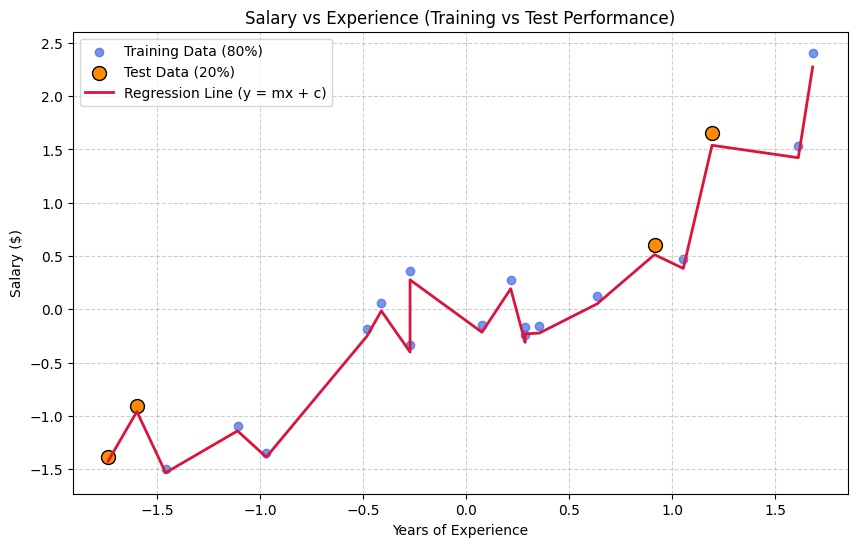

In [2]:








# 2. SPLIT THE DATA
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)




# 3. TRAIN THE MODEL
model = LinearRegression()
model.fit(X_train, y_train) # This is where the math (Gradient Descent) happens!

# 4. EVALUATE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Parameters ---")
#print(f"Slope (m): {model.coef_[0][0]:.2f}")
#print(f"Intercept (c): {model.intercept_:.2f}")
print("\n--- Evaluation Metrics ---")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# 5. VISUALIZATION
plt.figure(figsize=(10, 6))

# Plot training points (Blue)
plt.scatter(X_train, y_train, color='royalblue', label='Training Data (80%)', alpha=0.7)

# Plot test points (Orange/Gold) - These are the "Final Exam" points
plt.scatter(X_test, y_test, color='darkorange', label='Test Data (20%)', s=100, edgecolors='black')

# Plot the regression line (The model's "Logic")
# We predict over the whole range of X to show the line
plt.plot(x_scaled, model.predict(y_scaled), color='crimson', linewidth=2, label='Regression Line (y = mx + c)')

plt.title('Salary vs Experience (Training vs Test Performance)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [3]:
# 1. Convert input to a float
raw_input = float(input("Enter the number of years of experience: "))

# 2. Shape the input correctly (2D array: 1 row, 1 column)
# If your model used 'Location' too, you'd need that here as well!
input_df = pd.DataFrame([[raw_input]], columns=['Years_Exp'])

# 3. Use the ORIGINAL scaler (the one used during model.fit)
# Use .transform(), NOT .fit_transform()
num_experience_scaled = scaler_x.transform(input_df)

# 4. Predict
prediction_scaled = model.predict(num_experience_scaled)

# 5. Correctly Inverse Transform
# This assumes you also scaled your 'y' (Salary) during training
output = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1))

print(f"The predicted salary is: ${output[0][0]:,.2f}")
print("The predicted salary is",output[0])

The predicted salary is: $267,855.67
The predicted salary is [267855.66929612]


In [4]:
10


10